# Computation of shape contour and area during growth of propagules.


##  Documentation and Imports


Created on 27-05-2021

Author: Valentin Laplaud

This code aims to compute the shape of propagules growing in microfluidic chips. It detects gemmae contours using binarization, and saves the data of the contour position on the image, as well as the area and geometrical center position of each gemmae. 

A second part fits the evolution of gemmae in time with a delayed exponential.

In [3]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]

import gc
gc.collect()

# plotting stuff in jupyter
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline

COLOR = 'white'
COLOR2 = 'black'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

mpl.rcParams["figure.facecolor"] = COLOR2
mpl.rcParams["axes.facecolor"] = COLOR2
mpl.rcParams["savefig.facecolor"] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2


# to hide known warnings
import warnings
warnings.filterwarnings("ignore")

# my functions
import sys
sys.path.append(r'd:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/')
import VallapFunc as vf
from Main import BinarizeAndFitArea, BinarizeAndFitOsChoc
from GemmaeDetection import FindChipPos
import numpy as np

## Fetch data details

In [4]:
%run d:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/ExperimentList.py

Data choice made.


## Run analysis

### 03/27-09-2021 : Flux controls V5 

In [5]:
# BinarizeAndFitArea('210903_1mlh',StackList210903_1,P210903_1,Scale210903,FPH210903,Delay210903,0.98,'V^','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('210903_500ulh',StackList210903_5,P210903_5,Scale210903,FPH210903,Delay210903,0.98,'Vv','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])


# BinarizeAndFitArea('210927_1mlh',StackList210927_1,P210927_1,Scale210927,FPH210927,Delay210927,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('210927_500ulh',StackList210927_5,P210927_5,Scale210927,FPH210927,Delay210927,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### System control DV6 (22-10-2021)

In [6]:
# BinarizeAndFitArea('211022_Ct1',StackList211022_Ct1,P211022_Ct1,Scale211022,FPH211022,Delay211022,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('211022_Ct2',StackList211022_Ct2,P211022_Ct2,Scale211022,FPH211022,Delay211022,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### Degas & BSA controls DV6 (05-11-2021, 22-12-2021)

In [7]:
# BinarizeAndFitArea('211105_Deg_Bsa',StackList211105_Deg_Bsa,P211105_Deg_Bsa,Scale211105,FPH211105,Delay211105,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 20, 70),(60, 120,220)])

# BinarizeAndFitArea('211105_Degas',StackList211105_Degas,P211105_Degas,Scale211105,FPH211105,Delay211105,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 20, 70),(60, 120,220)])



# BinarizeAndFitArea('211222_Deg_Bsa',StackList211222_Deg_Bsa,P211222_Deg_Bsa,Scale211222,FPH211222,Delay211222,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('211222_Degas',StackList211222_Degas,P211222_Degas,Scale211222,FPH211222,Delay211222,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])


### Stade comparison DV6 (07/12/14-01-2022)

In [8]:
# BinarizeAndFitArea('220107_S1',StackList220107_S1,P220107_S1,Scale220107,FPH220107,Delay220107,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(25, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220107_S3',StackList220107_S3,P220107_S3,Scale220107,FPH220107,Delay220107,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(25, 30, 70),(60, 120,220)])


# BinarizeAndFitArea('220112_S1',StackList220112_S1,P220112_S1,Scale220112,FPH220112,Delay220112,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(20, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220112_S3',StackList220112_S3,P220112_S3,Scale220112,FPH220112,Delay220112,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(20, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220114_S1',StackList220114_S1,P220114_S1,Scale220114,FPH220114,Delay220114,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(25, 25, 70),(60, 120,220)])

# BinarizeAndFitArea('220114_S3',StackList220114_S3,P220114_S3,Scale220114,FPH220114,Delay220114,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(25, 25, 70),(60, 120,220)])


### System controls with Stade1 & degas DV6 (24-01-2022,14-02-2022)

In [9]:
# BinarizeAndFitArea('220124_Ct1',StackList220124_Ct1,P220124_Ct1,Scale220124,FPH220124,Delay220124,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220124_Ct2',StackList220124_Ct2,P220124_Ct2,Scale220124,FPH220124,Delay220124,0.98,'H<','F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220214_Ct1',StackList220214_Ct1,P220214_Ct1,Scale220214,FPH220214,Delay220214,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0],HSVrange =[(15, 17, 60),(70, 140,220)])

# BinarizeAndFitArea('220214_Ct2',StackList220214_Ct2,P220214_Ct2,Scale220214,FPH220214,Delay220214,0.98,'H>','F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)])


### Osmotic choc after 14-02-2022 

In [10]:
# BinarizeAndFitOsChoc('220214_Ct1_Osmo',StackList220214_Ct1_Osmo,P220214_Ct1_Osmo,Scale220214_Osmo,FPH220214_Osmo,0.95,'H<','F',
#                    showHist = False, debug = False, HSVrange =[(15, 30, 60),(70, 140,220)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])

# BinarizeAndFitOsChoc('220214_Ct2_Osmo',StackList220214_Ct2_Osmo,P220214_Ct2_Osmo,Scale220214_Osmo,FPH220214_Osmo,0.95,'H>','F',
#                    showHist = False, debug = False, HSVrange =[(15, 30, 60),(70, 140,220)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])
  

### Manitol 100mM (01-03-2022) + OC

In [11]:
# BinarizeAndFitArea('220301_Ct',StackList220301_Ct,P220301_Ct,Scale220301,FPH220301,Delay220301,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow = 15)
# BinarizeAndFitOsChoc('220301_Ct_Osmo',StackList220301_Ct_Osmo,P220301_Ct_Osmo,Scale220301_Osmo,FPH220301_Osmo,0.95,'H<','F',
#                    showHist = False, debug = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],
#                      FitIntervalComp = [0,25],FitIntervalRel = [23,60])

# BinarizeAndFitArea('220301_M100',StackList220301_M100,P220301_M100,Scale220301,FPH220301,Delay220301,0.98,'H>','CF',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow = 15)
# BinarizeAndFitOsChoc('220301_M100_Osmo',StackList220301_M100_Osmo,P220301_M100_Osmo,Scale220301_Osmo,FPH220301_Osmo,0.95,'H>','F',
#                    showHist = True, debug = True, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],
#                      FitIntervalComp = [0,22],FitIntervalRel = [27,60],TstartComp = 3,TstartRel = 6, saveWB = False)


### 31-05-2022 : DV7 ctrls + OC  


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Analyzing experiment : 220531_Ct1

Processing PPG40 :


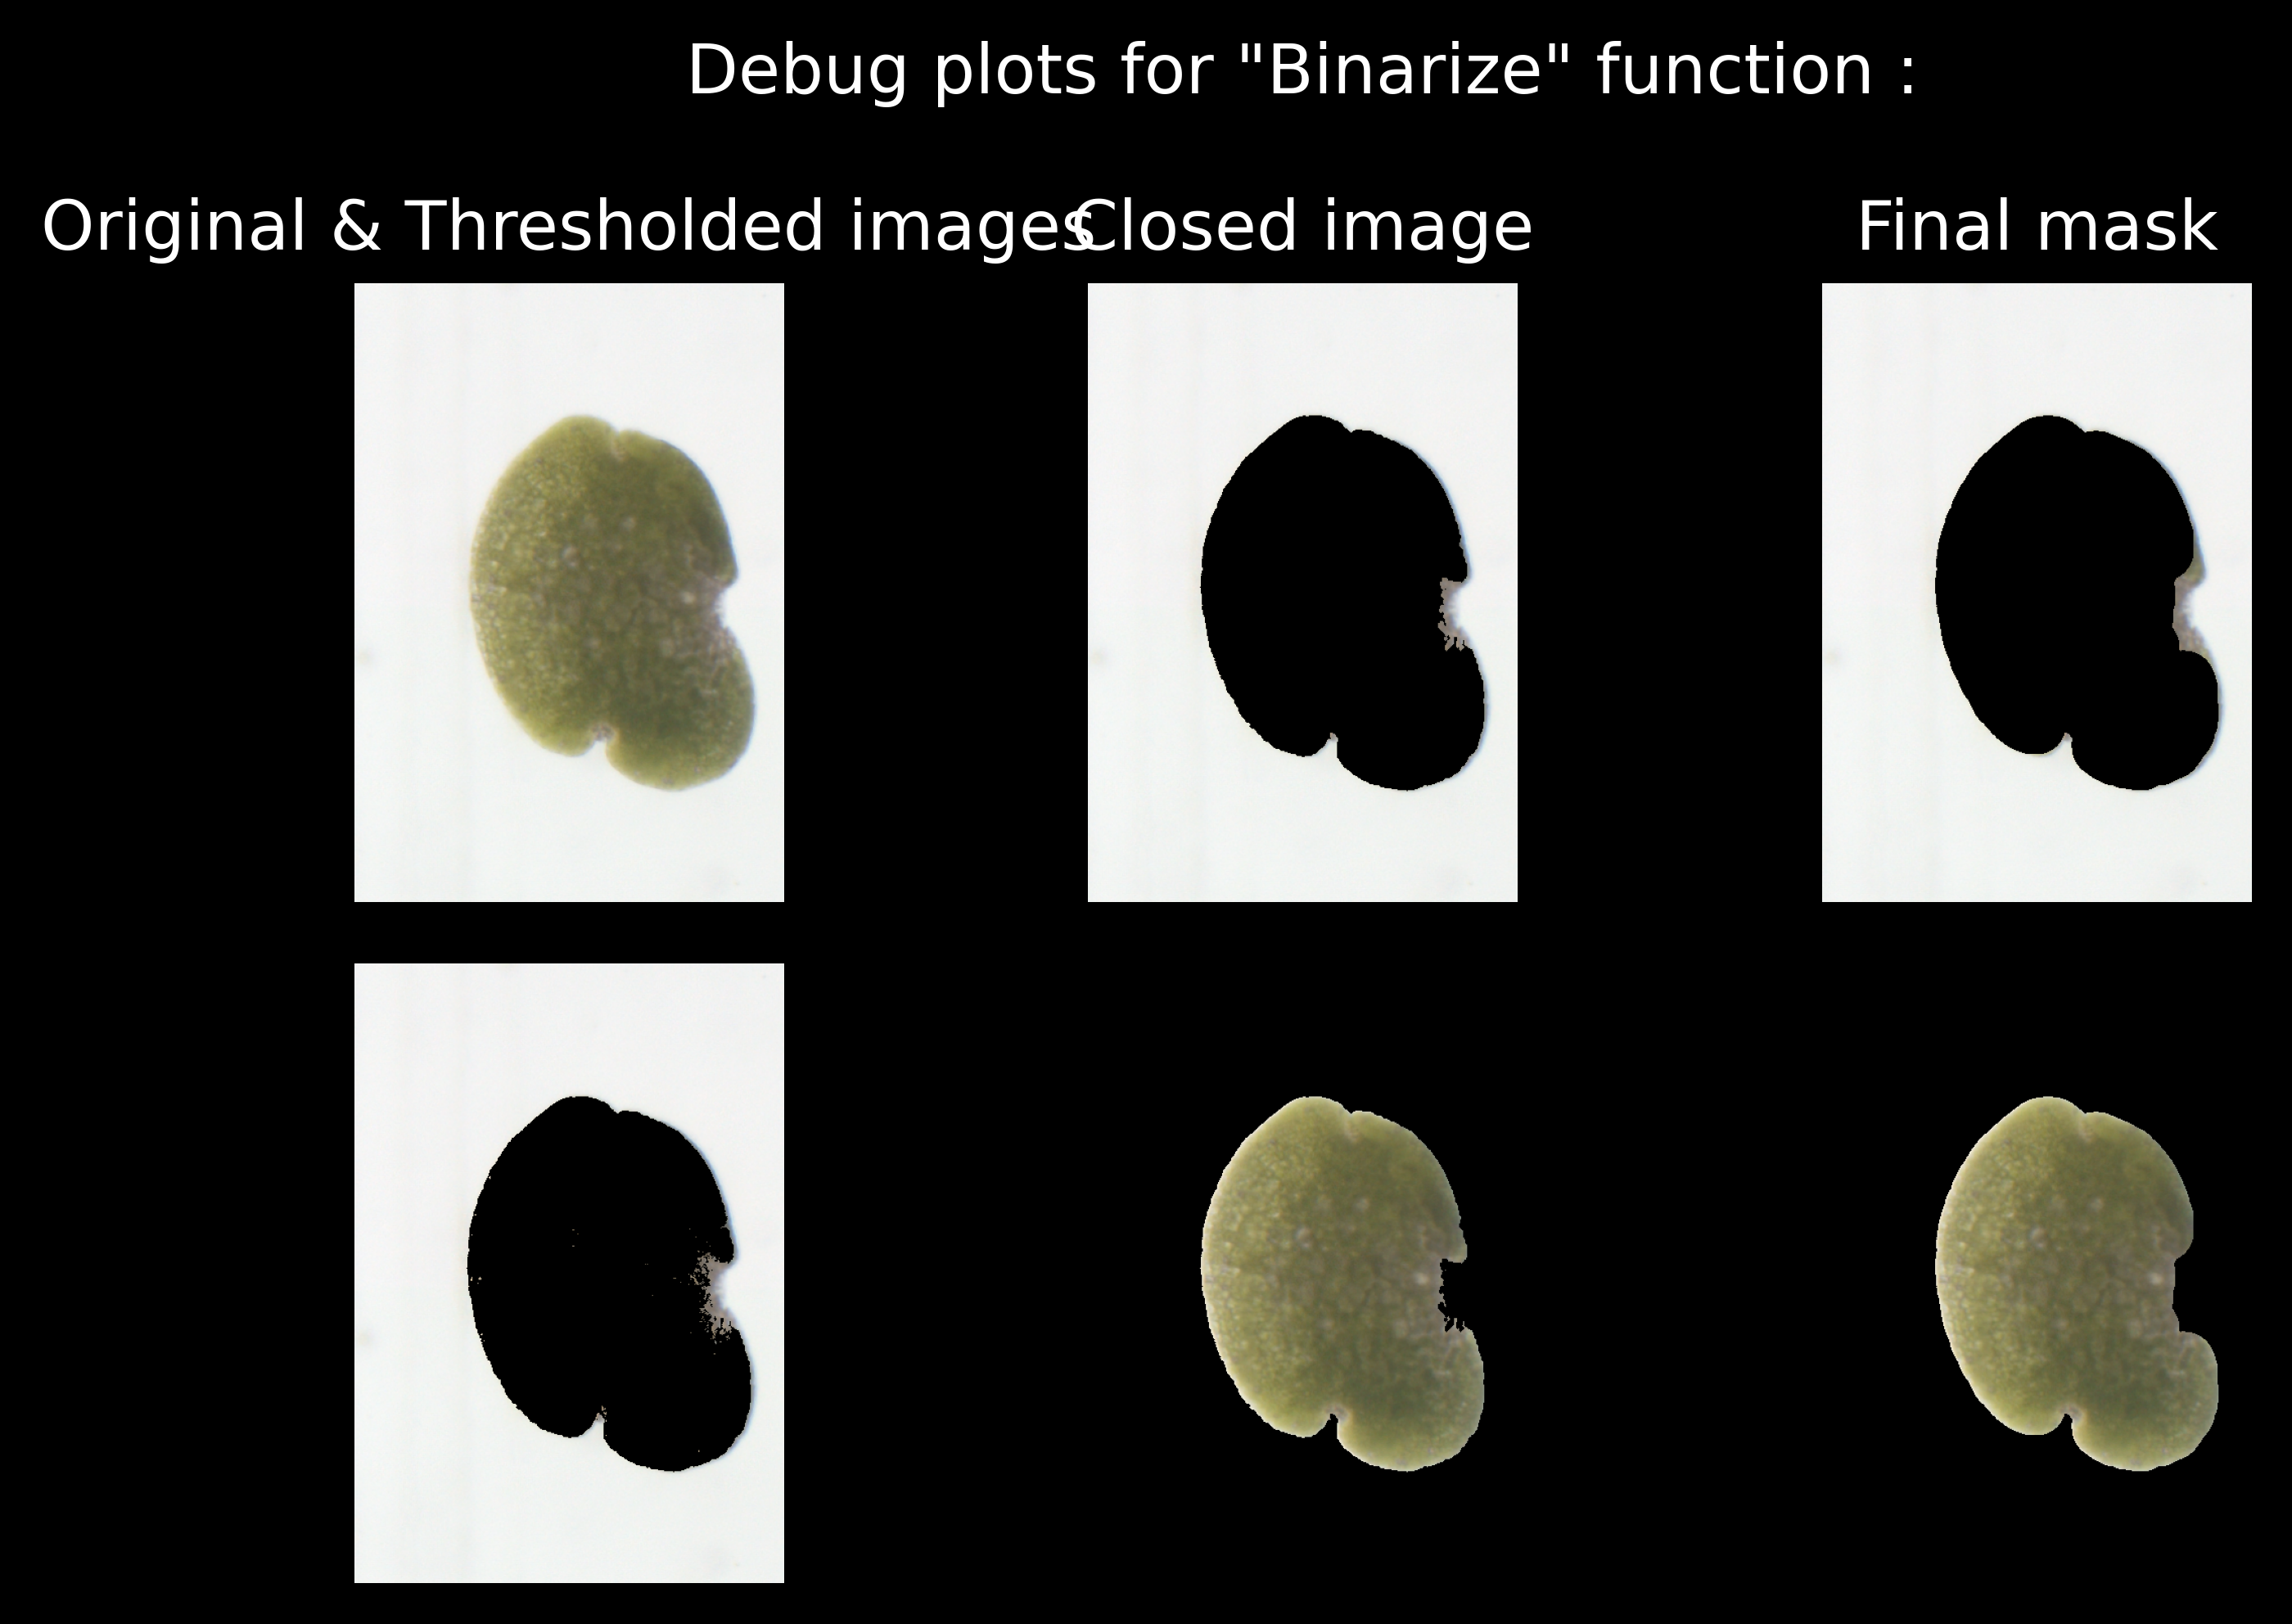

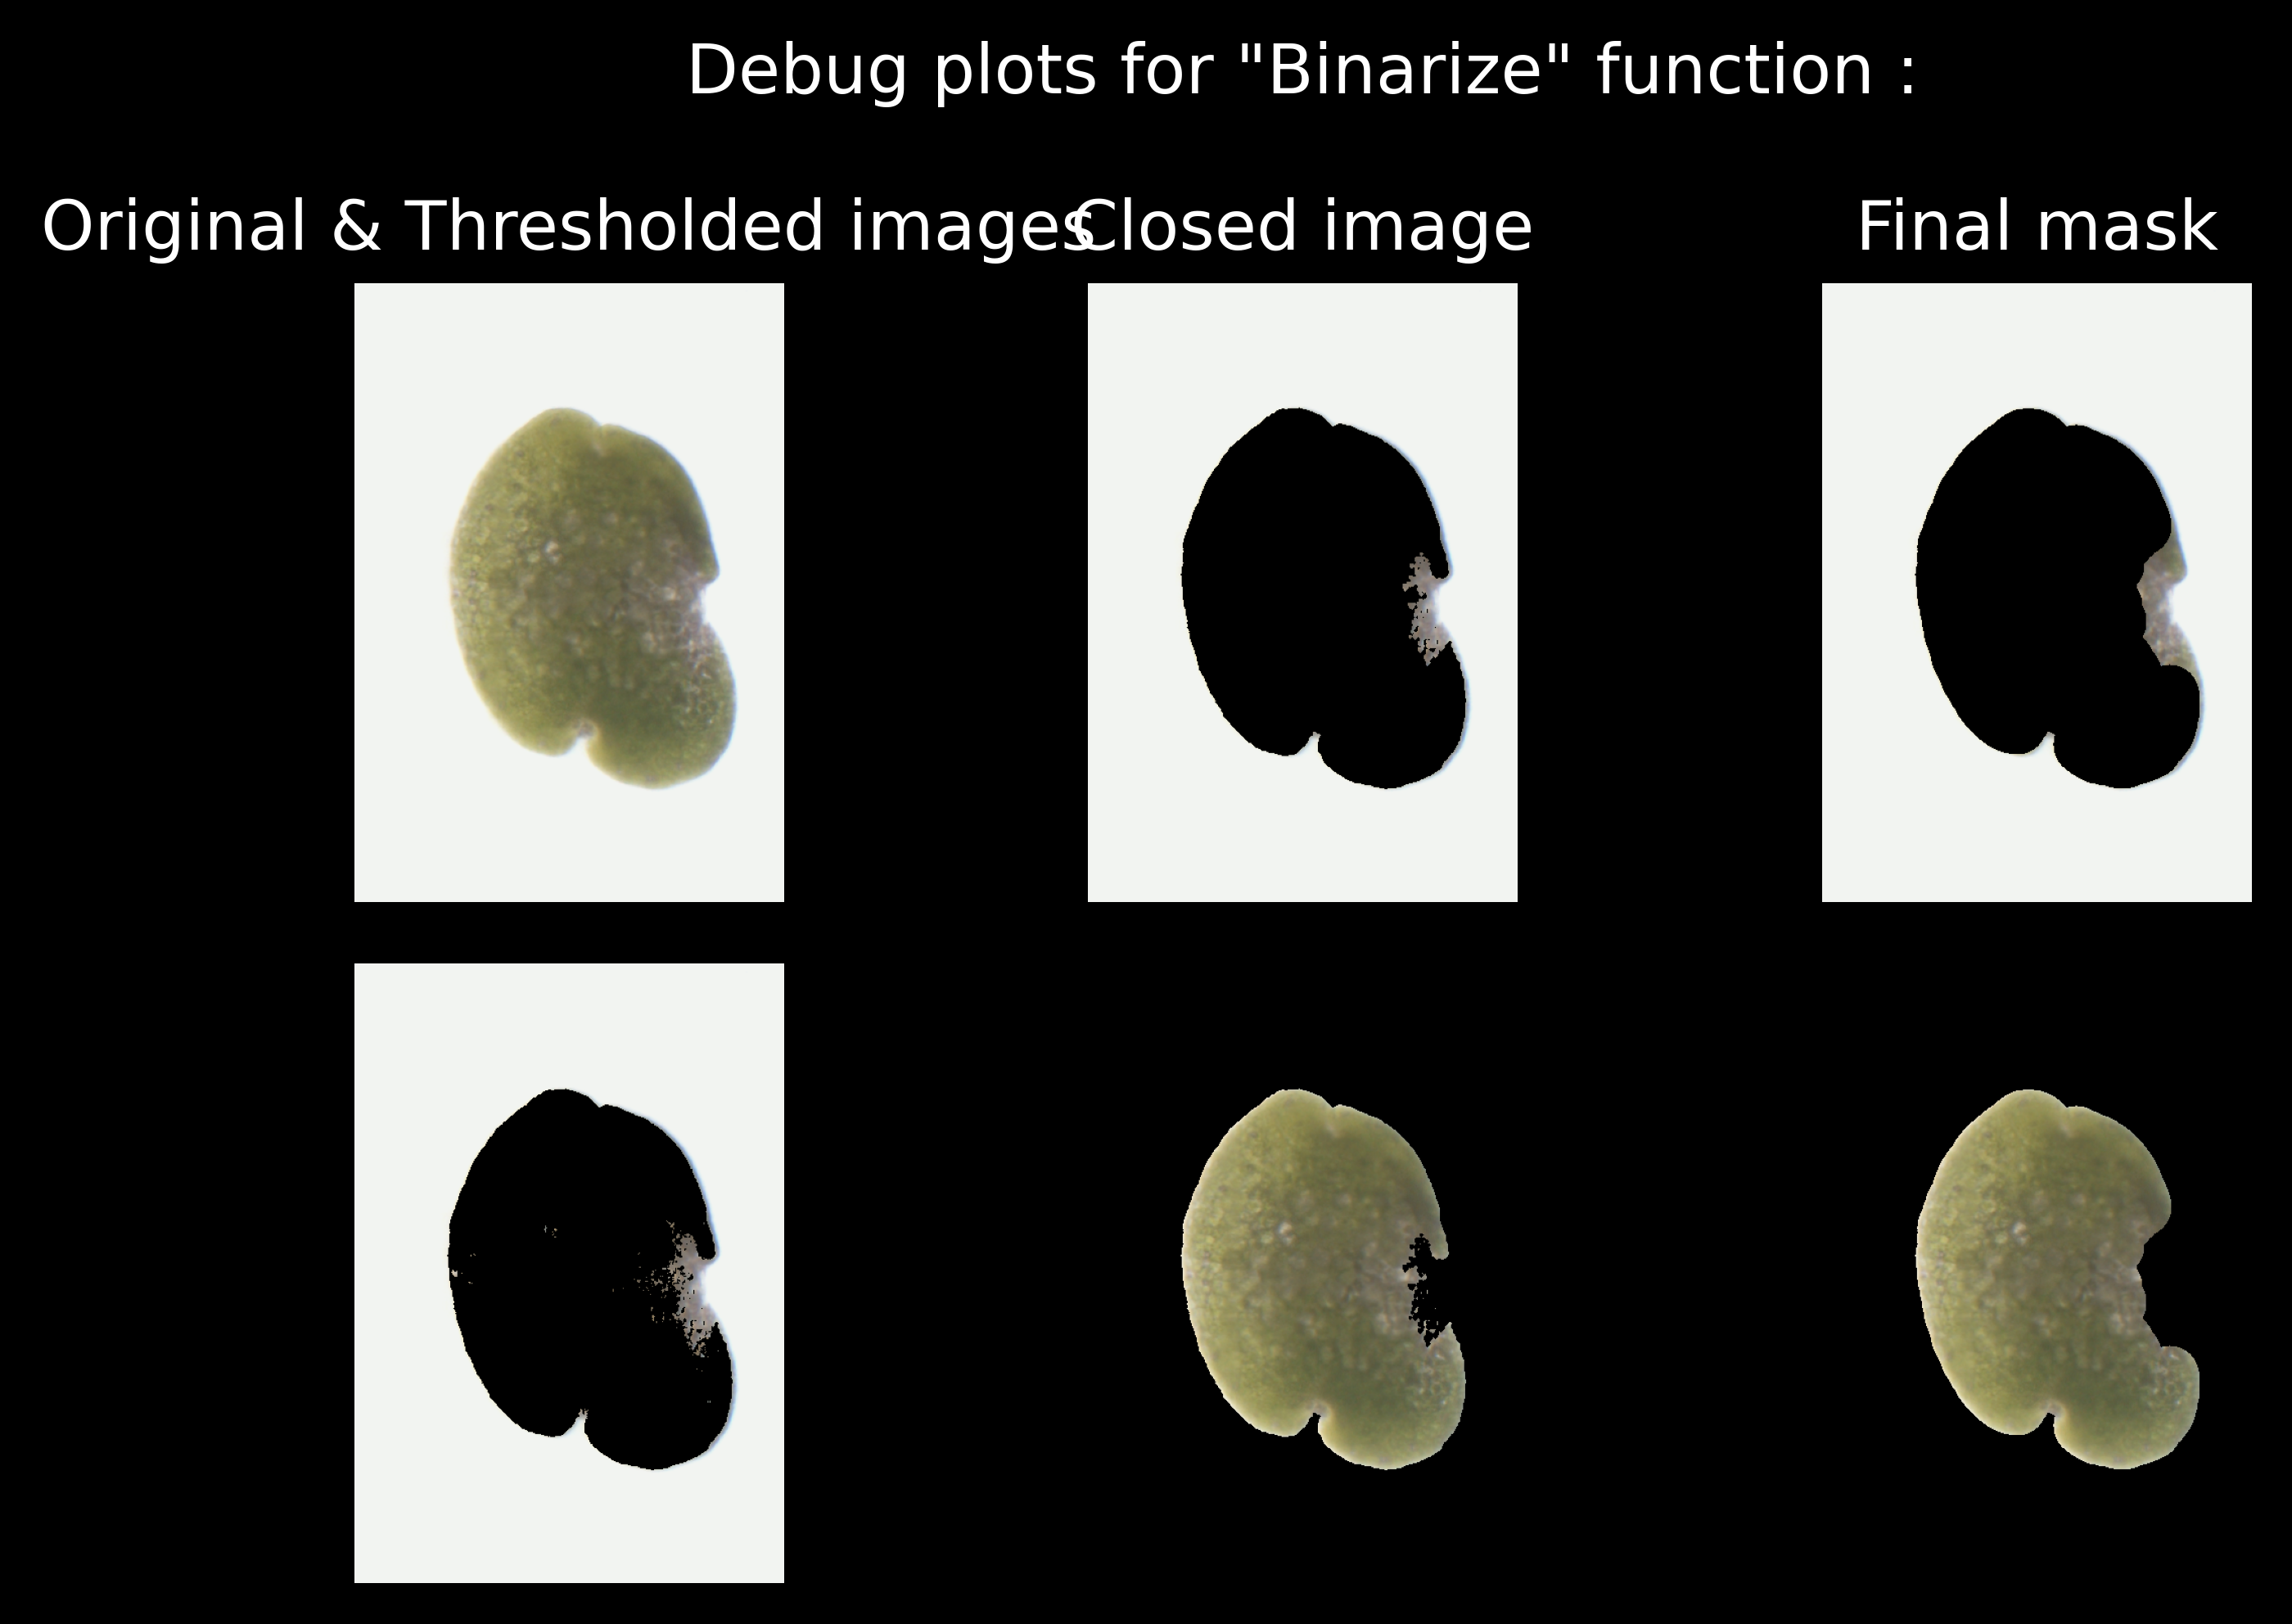

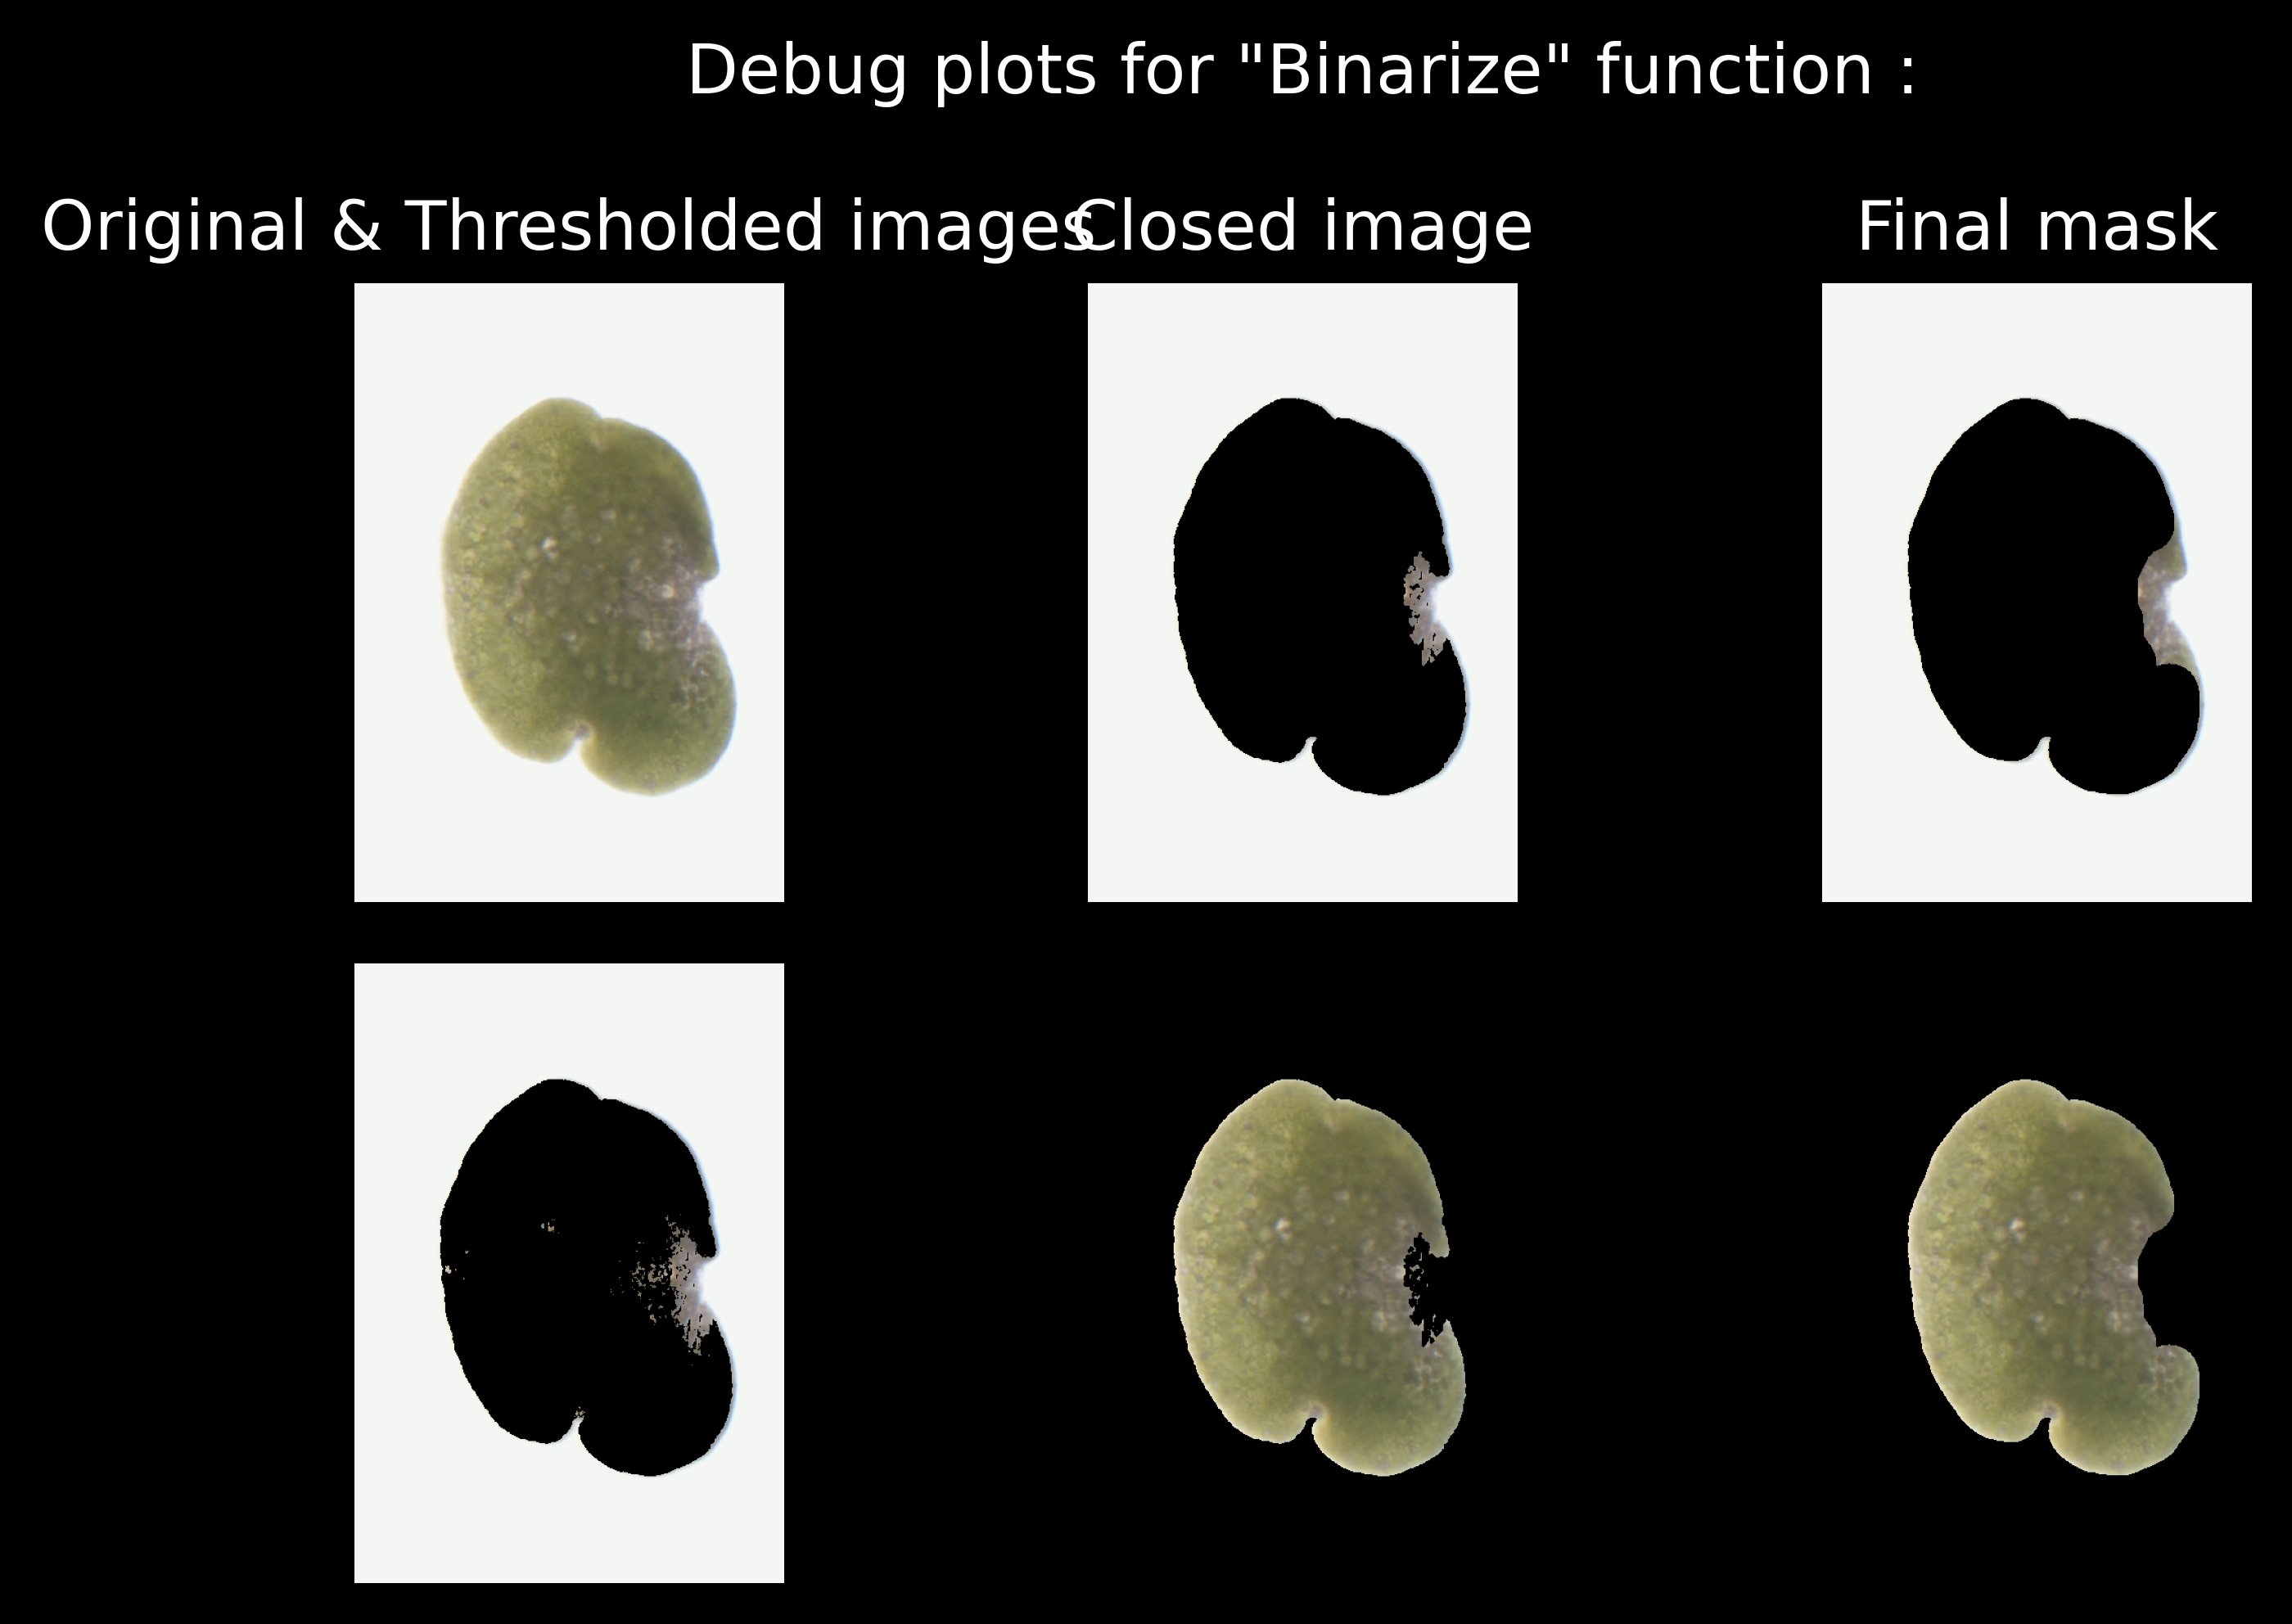


Binarization done for 61/61 images             





In [22]:
# BinarizeAndFitArea('220531_Ct1',StackList220531_Ct1,P220531_Ct1,Scale220531,FPH220531,Delay220531,0.98,'H>','F',
#                    debug = False, debugAll = True, debuglist = [0,30], HSVrange =[(20, 20, 60),(75, 160,240)],fitwindow=15)

# BinarizeAndFitArea('220531_Ct2',StackList220531_Ct2,P220531_Ct2,Scale220531,FPH220531,Delay220531,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0,10,40], HSVrange =[(20, 20, 60),(75, 160,240)],fitwindow=15)


# BinarizeAndFitOsChoc('220531_Ct1_Osmo',StackList220531_Ct1_Osmo,P220531_Ct1_Osmo,Scale220531_Osmo,FPH220531_Osmo,0.95,'H>','F',
#                    showHist = False, debug = False, debuglist = [0], HSVrange = [(20, 20, 60),(75, 160,240)] ,FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])  

# BinarizeAndFitOsChoc('220531_Ct2_Osmo',StackList220531_Ct2_Osmo,P220531_Ct2_Osmo,Scale220531_Osmo,FPH220531_Osmo,0.95,'H<','F',
#                    showHist = False, debug = False, debuglist = [0,10,40], HSVrange = [(20, 20, 60),(75, 160,240)] ,FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])  



### 27-07-2022 : DV7 Controls 

In [28]:
# BinarizeAndFitArea('220727_Hyper',StackList220727_Hyper,P220727_Hyper,Scale220727,FPH220727,Delay220722,0.98,'H>','BCF',
#                    debug = False, debugAll = False, debuglist = [22], HSVrange =[(15, 25, 40),(70, 150,160)])


BinarizeAndFitArea('220727_Hypo',StackList220727_Hypo,P220727_Hypo,Scale220727,FPH220727,Delay220722,0.98,'H<','BCF',
                   debug = False, debugAll = False, debuglist = [36,50,55], HSVrange =[(20, 25, 40),(70, 150,190)])



_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Analyzing experiment : 220727_Hypo

Processing PPG1 :
Binarization done for 61/61 images             
Processing PPG2 :
Binarization done for 61/61 images             
Processing PPG3 :
Binarization done for 61/61 images             
Processing PPG4 :
Binarization done for 61/61 images             
Processing PPG5 :
Binarization done for 61/61 images             
Processing PPG6 :
Binarization done for 61/61 images             
Processing PPG7 :
Binarization done for 61/61 images             
Processing PPG8 :
Binarization done for 61/61 images             
Processing PPG9 :
Binarization done for 61/61 images             
Processing PPG10 :
Binarization done for 61/61 images             
Processing PPG11 :
Binarization done for 61/61 images             
Processing PPG12 :
Binarization done for 61/61 images         


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Fitting area curve for : PPG9

Model for fit : ExpDel
Number of iterations : 3
Final tdeb variations :[1.8841793386462784, 0.09434789825546547, 0.020720659432095133]

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Fitting area curve for : PPG10

Model for fit : ExpDel
Number of iterations : 2
Final tdeb variations :[1, 0.3035008290104079, 0.041994432476759866]

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Fitting area curve for : PPG11

Model for fit : ExpDel
Number of iterations : 2
Final tdeb variations :[1, 0.4243056514926231, 0.01698727399649235]

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Fitting area curve for : PPG12

Model for fit : ExpDel
Number of iterations : 2
Final tdeb variations :[1, 7.690075230998545, 0.029719121304512267]

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Fitting area curve for : PPG50

Model for fit : ExpDel
Number of iterations : 3
Final tdeb variations :[0.2510584209251747, 0.12618965539887278, 0.02843418324879817]

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Fitting area curve for : PPG51

Model for fit : ExpDel
Number of iterations : 3
Final tdeb variations :[0.6802819590348406, 0.07063009918507808, 0.006632069535593579]



Analyzing : 220727_Hypo








### DV7 Ctrls + OC (01-08-2022)

In [14]:
# BinarizeAndFitArea('220801_Ct1',StackList220801_Ct1,P220801_Ct1,Scale220801,FPH220801,Delay220722,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [50], HSVrange =[(15, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220801_Ct2',StackList220801_Ct2,P220801_Ct2,Scale220801,FPH220801,Delay220722,0.98,'H>','F',
#                    debug = False, debugAll =False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,190)],fitwindow=15)


# BinarizeAndFitOsChoc('220801_Ct1_Osmo',StackList220801_Ct1_Osmo,P220801_Ct1_Osmo,Scale220801_Osmo,FPH220801_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],FitIntervalComp = [0,12],
#                      FitIntervalRel = [23,60],TstartComp = 5,TstartRel = 9)


# BinarizeAndFitOsChoc('220801_Ct2_Osmo',StackList220801_Ct2_Osmo,P220801_Ct2_Osmo,Scale220801_Osmo,FPH220801_Osmo,0.95,'H>','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(20, 20, 40),(70, 160,180)],FitIntervalComp = [0,13],
#                      RelValidation = False,TstartComp = 3, FitIntervalRel = [10,13],TstartRel = 1)

### DV7 Manitol 100mM (08-08-2022) + OC

In [15]:
# BinarizeAndFitArea('220808_Ct',StackList220808_Ct,P220808_Ct,Scale220808,FPH220808,Delay220808,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [50], HSVrange =[(15, 25, 40),(70, 150,160)])

# BinarizeAndFitArea('220808_100mM',StackList220808_100mM ,P220808_100mM ,Scale220808,FPH220808,Delay220808,0.98,'H>','F',
#                    debug = False, debugAll =False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,190)],fitwindow=15)


# BinarizeAndFitOsChoc('220808_Ct_Osmo',StackList220808_Ct_Osmo ,P220808_Ct_Osmo ,Scale220808_Osmo,FPH220808_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(0, 20, 0),(50, 250,170)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [30,65],TstartComp = 4,TstartRel = 5)

# BinarizeAndFitOsChoc('220808_100mM_Osmo',StackList220808_100mM_Osmo ,P220808_100mM_Osmo ,Scale220808_Osmo,FPH220808_Osmo,0.95,'H>','F',
#                    debug = False, showHist = False, debuglist = [0,10,20,40], HSVrange =[(0, 20, 0),(50, 250,170)],FitIntervalComp = [0,25],
#                      RelValidation = True,TstartComp = 4, FitIntervalRel = [30,65],TstartRel = 5)


### DV7 Manitol 100mM + OC (28-09-2022)

In [16]:
# BinarizeAndFitArea('220928_Ct',StackList220928_Ct,P220928_Ct,Scale220928,FPH220928,Delay220928,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('220928_Ct_Osmo',StackList220928_Ct_Osmo ,P220928_Ct_Osmo ,Scale220928_Osmo,FPH220928_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 2,TstartRel = 9)

# BinarizeAndFitArea('220928_100mM',StackList220928_100mM,P220928_100mM,Scale220928,FPH220928,Delay220928,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('220928_100mM_Osmo',StackList220928_100mM_Osmo ,P220928_100mM_Osmo ,Scale220928_Osmo,FPH220928_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 2,TstartRel = 9)


### DV7 DV7 OC after pectinase (10U, 2h, 10-04-2022)

In [17]:
# BinarizeAndFitOsChoc('221004_Ct_Osmo',StackList221004_Ct_Osmo ,P221004_Ct_Osmo ,Scale221004_Osmo,FPH221004_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0], HSVrange =[(15, 25, 40),(70, 150,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,55],TstartComp = 2,TstartRel = 9)

# BinarizeAndFitOsChoc('221004_Pase10U_Osmo',StackList221004_Pase10U_Osmo ,P221004_Pase10U_Osmo ,Scale221004_Osmo,FPH221004_Osmo,
#                      0.98,'H>','F',debug = False, showHist = False, debuglist = [0],HSVrange =[(15, 25, 40),(70, 150,190)],
#                      FitIntervalComp = [0,28],FitIntervalRel = [23,55],TstartComp = 2,TstartRel = 9)

### DV7 Growth 100mM + OC (25-10-2022)

In [18]:

# BinarizeAndFitArea('221025_Ct',StackList221025_Ct,P221025_Ct,Scale221025,FPH221025,Delay221025,0.98,'H<','F',
#                    debug = False, debugAll = True, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],fitwindow = 15)

# BinarizeAndFitOsChoc('221025_Ct_Osmo',StackList221025_Ct_Osmo ,P221025_Ct_Osmo ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = True, showHist = False, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 11)

# BinarizeAndFitOsChoc('221025_Ct_Osmo2',StackList221025_Ct_Osmo2 ,P221025_Ct_Osmo2 ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 11)


# BinarizeAndFitArea('221025_100mM',StackList221025_100mM,P221025_100mM,Scale221025,FPH221025,Delay221025,0.98,'H<','F',
#                    debug = False, debugAll = False, debuglist = [0,20], 
#                    HSVrange =[(15, 20, 40),(70, 170,190)], fitwindow = 15)

# StackList221025_100mM_Osmo 

# BinarizeAndFitOsChoc('221025_100mM_Osmo',StackList221025_100mM_Osmo ,P221025_100mM_Osmo ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = True, debuglist = [40,41,42,43,44,45,46,47,48,49], HSVrange =[(12, 3, 40),(80, 170,190)],FitIntervalComp = [0,24],
#                      FitIntervalRel = [25,55],TstartComp = 5,TstartRel = 6, saveWB = False)

# BinarizeAndFitOsChoc('221025_100mM_Osmo2',StackList221025_100mM_Osmo2 ,P221025_100mM_Osmo2 ,Scale221025_Osmo,FPH221025_Osmo,0.95,'H<','F',
#                    debug = False, showHist = False, debuglist = [0,20], HSVrange =[(15, 20, 40),(70, 170,190)],FitIntervalComp = [0,28],
#                      FitIntervalRel = [23,60],TstartComp = 4,TstartRel = 8)

### Natalia's ABA experiments (22-07-2022)

In [19]:

# BinarizeAndFitArea('220722_Ct',StackList220722_Ct,P220722_Ct,Scale220722,FPH220722,Delay220722,0.98,'F',
#                    debug = False, debugAll = False, debuglist = [1, 20, 50], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220722_ABA',StackList220722_ABA,P220722_ABA,Scale220722,FPH220722,Delay220722,0.98,'F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)



## Test Zone

In [20]:
# %run D:/Users/laplaud/Desktop/PostDoc/Code/JupyterNB/PropaguleAnalysis/2_AreaAnalysis.ipynb